# Demo: PID Control of a Wheel

Import modules and configure the notebook.

In [1]:
# These are standard modules
import time
import numpy as np
import matplotlib.pyplot as plt

# This is a custom interface to the pybullet simulator
import ae353_wheel

pybullet build time: Oct 28 2022 16:21:09


Create an instance of the `Simulator` class, which is an interface to the [pybullet](http://pybullet.org) simulation engine.

There are two optional arguments:

* `display` (`True` or `False`) is whether or not to show the simulation window;
* `damping` (a non-negative floating-point number) is the coefficient of viscous friction at the wheel joint;
* `roll` (a floating-point number) is the angle of the ground;
* `mass` (a non-negative floating-point number) is the mass in kilograms of the orange marker that is attached to the wheel.

You can also change `damping`, `roll`, or `mass` on the fly by using the functions `simulator.set_damping()`, `simulator.set_roll()`, and `simulator.set_mass()`.

In [2]:
simulator = ae353_wheel.Simulator(
    display=True,
    damping=0.5,
    roll=0.,
    mass=0.,
)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7001/static/


In [31]:
simulator.set_damping(0.)
simulator.set_roll(np.pi / 2)
simulator.set_mass(0.1)

Define a controller that maps sensor measurements (`wheel_angle`) to actuator commands (`wheel_torque`). By default, it chooses to apply zero torque to the wheel. Modify the `run` function to make the controller behave differently. This function will be called 100 times per second (i.e., at 100 Hz) by the simulator.

In [42]:
class Controller:
    def __init__(self):
        self.r = 1.
        print('init')
    
    def reset(self):
        print('reset')
        self.old_e = 0.
        self.int_e = 0.
    
    def run(self, t, wheel_angle):
        """
        INPUTS
         t = current time (s)
         wheel_angle = angle of wheel (rad)
        
        OUTPUTS
         wheel_torque = torque applied to wheel by motor on ground (N m)
        """
        
        y = wheel_angle
        #r = 1.
        e = y - self.r
        der_e = (e - self.old_e) / 0.01
        self.old_e = e
        
        self.int_e += 0.01 * e
        
        
        k_p = 7.
        k_d = 1.
        k_i = 1.
        u = - k_p * e - k_d * der_e - k_i * self.int_e
        
        wheel_torque = u
        
        return wheel_torque

Create an instance of the controller.

In [43]:
controller = Controller()

init


Reset the simulator. Optional arguments allow you to specify the initial wheel angle and velocity. If the value of either argument is `None` (or if the argument is left unspecified), then its value will be chosen at random.

In [44]:
simulator.reset(
    wheel_angle=0.,
    wheel_velocity=0.,
)

Reset the controller.

In [45]:
controller.reset()

reset


Run the simulator.

In [59]:
data = simulator.run(
    controller,           # <-- required (an instance of your Controller class)
    max_time=1.21,         # <-- optional (how long you want to run the simulation in seconds)
    data_filename=None,   # <-- optional (name of file to which you want data saved, e.g., 'my_data.json')
    video_filename=None,  # <-- optional (name of file to which you want video saved, e.g., 'my_video.mov')
)

Get, show, and save a snapshot of the simulation after the last time step.

In [ ]:
# Get snapshot as height x width x 4 numpy array of RGBA values
rgba = simulator.snapshot()

# Display snapshot
plt.figure(figsize=(8, 8))
plt.imshow(rgba)

# Save snapshot
plt.imsave('my_snapshot.png', rgba)

Plot the results.

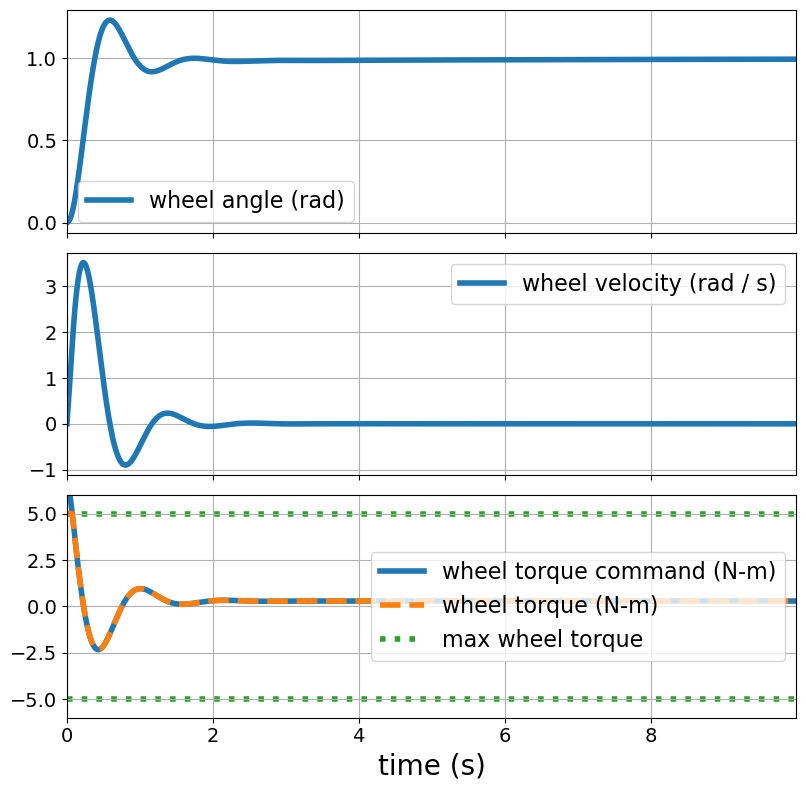

In [47]:
# Create a figure with three subplots, all of which share the same x-axis
fig, (
    ax_angle,
    ax_velocity,
    ax_torque,
) = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# Plot wheel angle on first subplot
ax_angle.plot(
    data['t'], data['wheel_angle'],
    label='wheel angle (rad)', linewidth=4,
)
ax_angle.grid()
ax_angle.legend(fontsize=16)
ax_angle.tick_params(labelsize=14)

# Plot wheel velocity on second subplot
ax_velocity.plot(
    data['t'], data['wheel_velocity'],
    label='wheel velocity (rad / s)', linewidth=4,
)
ax_velocity.grid()
ax_velocity.legend(fontsize=16)
ax_velocity.tick_params(labelsize=14)

# Plot wheel torque on third subplot
ax_torque.plot(
    data['t'], data['wheel_torque_command'],
    label='wheel torque command (N-m)', linewidth=4,
)
ax_torque.plot(
    data['t'], data['wheel_torque'],
    '--', label='wheel torque (N-m)', linewidth=4,
)
ax_torque.plot(
    data['t'], np.ones_like(data['t']) * simulator.tau_max,
    ':', label='max wheel torque', linewidth=4, color='C2', zorder=0,
)
ax_torque.plot(
    data['t'], -np.ones_like(data['t']) * simulator.tau_max,
    ':', linewidth=4, color='C2', zorder=0,
)
ax_torque.grid()
ax_torque.legend(fontsize=16)
ax_torque.tick_params(labelsize=14)

# Set x-axis properties (only need to do this on the third
# subplot since all three subplots share the same x-axis)
ax_torque.set_xlabel('time (s)', fontsize=20)
ax_torque.set_xlim([data['t'][0], data['t'][-1]])
ax_torque.set_ylim(-1.2 * simulator.tau_max, 1.2 * simulator.tau_max)

# Make the arrangement of subplots look nice
fig.tight_layout()

Save the figure (without transparent background).

In [ ]:
fig.savefig('my_figure.png', facecolor='white', transparent=False)

In [48]:
data.keys()

dict_keys(['t', 'wheel_angle', 'wheel_velocity', 'wheel_torque', 'wheel_torque_command'])

In [53]:
index_at_t = np.argwhere(data['t'] == 1.2).item()
print(data['wheel_angle'][index_at_t])

0.9199299492064187


In [50]:
data['wheel_angle']

array([0.        , 0.00149806, 0.00539278, 0.01168352, 0.02036924,
       0.03144852, 0.04491952, 0.06078004, 0.07902747, 0.09957178,
       0.12224817, 0.1468786 , 0.17328613, 0.20129571, 0.23073479,
       0.26143375, 0.29322641, 0.32595046, 0.35944785, 0.39356518,
       0.428154  , 0.46307117, 0.49817905, 0.53334581, 0.56844559,
       0.60335868, 0.63797165, 0.6721775 , 0.70587569, 0.73897221,
       0.77137963, 0.80301707, 0.83381017, 0.86369106, 0.89259829,
       0.92047674, 0.94727749, 0.97295769, 0.99748048, 1.02081475,
       1.042935  , 1.0638212 , 1.08345853, 1.10183721, 1.1189523 ,
       1.13480347, 1.1493948 , 1.16273449, 1.17483474, 1.1857114 ,
       1.19538383, 1.20387463, 1.2112094 , 1.21741652, 1.22252691,
       1.22657385, 1.22959268, 1.23162063, 1.23269661, 1.23286098,
       1.23215533, 1.23062231, 1.22830545, 1.2252489 , 1.22149734,
       1.21709575, 1.21208924, 1.20652293, 1.20044176, 1.19389037,
       1.18691295, 1.17955311, 1.17185377, 1.16385703, 1.15560

In [60]:
data['wheel_angle'][-1]

0.9964824982191949

In [61]:
data['t'][-1]

1.2

In [62]:
data

{'t': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
        1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ]),
 'wheel_angle': array([0.99583019, 0.9958361 , 0.995842  , 0.99584789, 0.99585377,
        0.99585964, 0.99586551, 0.99587136, 0.99587721, 0.99588305,
        0.99588889, 0.995894

In [64]:
tmp = {
    'x': [1, 2, 3],
    'y': [4, 5, 6],
}

In [65]:
tmp['x']

[1, 2, 3]